In [1]:
%load_ext autoreload
%autoreload 2

# 1. Load Library

In [2]:
import os
import pickle
import paxplot as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# cwd
print(f'Current working directory: {os.getcwd()}')
# change directory
os.chdir('../')
print(f'New working directory: {os.getcwd()}')

Current working directory: /Users/gbemidebe/Documents/GitHub/ImputeNet/notebooks
New working directory: /Users/gbemidebe/Documents/GitHub/ImputeNet


In [3]:
from cdi.plotters import Plotters
from cdi.dataPreprocessing import Imputation

plotter = Plotters()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


# 2. Load Data

In [4]:
desired_columns = ['VW', 'FR', 'CNaCl', 'SSA', 'PV', 'Psave', 'PVmicro', 'ID/IG', 'N', 'O', 'EC']

data = pd.read_excel('data/cdi_data.xlsx', sheet_name='data_cleaned')
data = data[desired_columns]
print(data.shape)
data.head()

(583, 11)


,VW,FR,CNaCl,SSA,PV,Psave,PVmicro,ID/IG,N,O,EC
0,1.2,9.0,390.0,651.0,0.50,3.07,0.18,NaN,NaN,NaN,6.40
1,1.2,9.0,390.0,512.0,0.29,2.27,0.23,NaN,NaN,NaN,4.60
2,1.0,25.0,292.0,1877.0,2.40,5.11,0.30,0.92,4.6,NaN,10.00
3,0.6,25.0,292.0,1877.0,2.40,5.11,0.30,0.92,4.6,NaN,5.63
4,0.8,25.0,292.0,1877.0,2.40,5.11,0.30,0.92,4.6,NaN,8.20


In [5]:
data.describe().transpose() # different count because of missing values

,count,mean,std,min,25%,50%,75%,max
VW,583.0,1.255918,0.295897,0.40,1.200,1.20,1.400,2.00
FR,575.0,28.266887,17.789518,2.50,15.000,25.00,40.000,100.00
CNaCl,583.0,386.287736,380.775709,20.00,100.000,292.50,500.000,5000.00
SSA,583.0,1119.613516,773.893744,4.50,586.900,907.00,1450.600,4482.00
PV,573.0,0.947818,0.661125,0.02,0.500,0.78,1.250,4.20
Psave,581.0,4.354802,4.170144,0.00,2.070,2.89,4.870,23.71
PVmicro,263.0,0.348327,0.273427,0.00,0.130,0.27,0.500,1.06
ID/IG,401.0,1.027160,0.193679,0.52,0.910,1.02,1.100,1.62
N,426.0,3.411690,3.705223,0.00,0.000,2.67,4.900,14.33
O,411.0,8.157360,4.710666,0.00,5.300,7.70,10.240,32.09


# 3. Determine threshold

In [6]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from cdi.optimizer import get_threshold
from cdi.plotters import plot_elbow

In [7]:
method = 'ExtraTreesRegressor'
model = IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=20),
                                 random_state=0,
                                 max_iter=200)

IMPUTER = Imputation(data=data, columns=desired_columns, model=model, method=method)

df_imputed = IMPUTER.impute_data(split_data=False)

2024-05-12 20:59:28.967 | INFO     | cdi.dataPreprocessing:impute:100 - Database path:     VW    FR  CNaCl     SSA    PV  Psave  PVmicro  ID/IG    N   O     EC
0  1.2   9.0  390.0   651.0  0.50   3.07     0.18    NaN  NaN NaN   6.40
1  1.2   9.0  390.0   512.0  0.29   2.27     0.23    NaN  NaN NaN   4.60
2  1.0  25.0  292.0  1877.0  2.40   5.11     0.30   0.92  4.6 NaN  10.00
3  0.6  25.0  292.0  1877.0  2.40   5.11     0.30   0.92  4.6 NaN   5.63
4  0.8  25.0  292.0  1877.0  2.40   5.11     0.30   0.92  4.6 NaN   8.20
2024-05-12 20:59:28.968 | INFO     | cdi.dataPreprocessing:impute:101 - ML method: ExtraTreesRegressor

2024-05-12 20:59:28.968 | INFO     | cdi.dataPreprocessing:impute:103 - Number of data points: 583
2024-05-12 20:59:28.969 | WARNING  | cdi.dataPreprocessing:impute:106 - Number of missing values in "VW": 0
2024-05-12 20:59:28.970 | WARNING  | cdi.dataPreprocessing:impute:106 - Number of missing values in "FR": 8
2024-05-12 20:59:28.971 | WARNING  | cdi.dataPreprocessi

2024-05-12 20:59:28.974 | WARNING  | cdi.dataPreprocessing:impute:106 - Number of missing values in "O": 172
2024-05-12 20:59:28.975 | WARNING  | cdi.dataPreprocessing:impute:106 - Number of missing values in "EC": 0
2024-05-12 20:59:34.051 | SUCCESS  | cdi.dataPreprocessing:impute:120 - Final Data shape is (583, 11).
2024-05-12 20:59:34.053 | SUCCESS  | cdi.dataPreprocessing:impute:121 - Imputation completed using ExtraTreesRegressor model.


In [8]:
# get the feature space
training_data = df_imputed.iloc[:, :-1]
training_data.head()

,VW,FR,CNaCl,SSA,PV,Psave,PVmicro,ID/IG,N,O
0,1.2,9.0,390.0,651.0,0.50,3.07,0.18,0.9035,1.5290,6.4150
1,1.2,9.0,390.0,512.0,0.29,2.27,0.23,0.8930,1.2685,6.0095
2,1.0,25.0,292.0,1877.0,2.40,5.11,0.30,0.9200,4.6000,9.5335
3,0.6,25.0,292.0,1877.0,2.40,5.11,0.30,0.9200,4.6000,9.3990
4,0.8,25.0,292.0,1877.0,2.40,5.11,0.30,0.9200,4.6000,9.2515


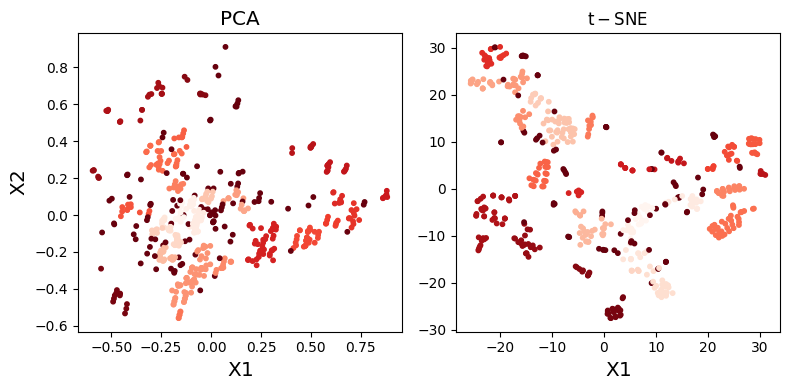

In [9]:
plotter.plot_design_space(training_data)

In [10]:
# check the threshold for different n_neighbors
record_threshold = {}
for n_neigh in [2, 3, 5, 10, 20, 30, 40, 50]:
    threshold, nbrs, distances = get_threshold(plot=plot_elbow, n_neighbors=n_neigh, training_data=training_data.values, show_fig=False)
    record_threshold[n_neigh] = threshold
    print(f'n_neighbor: {n_neigh}, threshold: {threshold}, max_distance: {max(distances)}')

n_neighbor: 2, threshold: 1014.9895836194577, max_distance: 2000.0
n_neighbor: 3, threshold: 1500.000000027, max_distance: 3005.02975939607
n_neighbor: 5, threshold: 1911.466704972454, max_distance: 3303.4951983534847
n_neighbor: 10, threshold: 4002.1486637937687, max_distance: 4003.7737017538843
n_neighbor: 20, threshold: 4022.3359314683053, max_distance: 4318.268582824168
n_neighbor: 30, threshold: 4404.618931638922, max_distance: 4452.392762850696
n_neighbor: 40, threshold: 4404.618931638922, max_distance: 4474.329138344904
n_neighbor: 50, threshold: 4404.618931638922, max_distance: 4501.910022108838


Text(0, 0.5, '$\\rm threshold$')

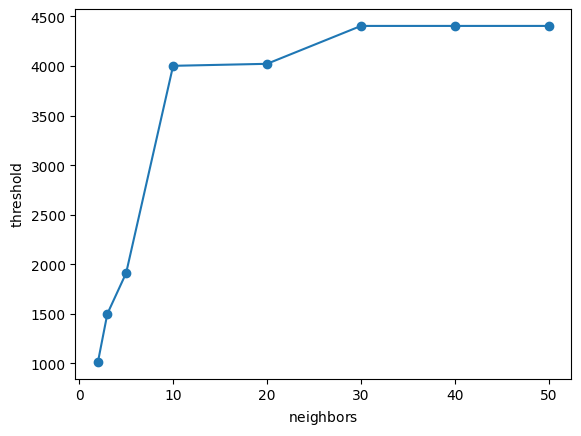

In [11]:
# plot the threshold against n_neighbors
plt.plot(list(record_threshold.keys()), list(record_threshold.values()), 'o-')
plt.xlabel(r'$\rm neighbors$')
plt.ylabel(r'$\rm threshold$')

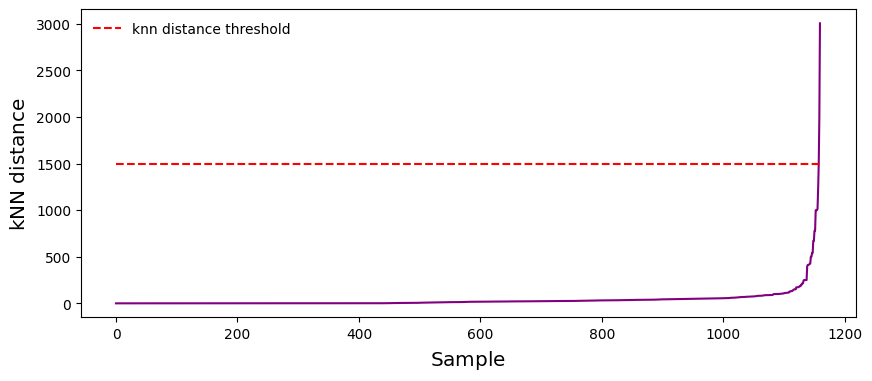

Threshold: 1500.000000027, Max KNN distance from 3 neigbhors: 3005.02975939607


In [12]:
selected_neighbor = 3
threshold, nbrs, distances = get_threshold(plot=plot_elbow, training_data=training_data.values, n_neighbors=selected_neighbor, show_fig=True)

print(f"Threshold: {threshold}, Max KNN distance from {selected_neighbor} neigbhors: {max(distances)}")

# 4. ML model

In [13]:
from cdi.model import salt_adsorption_ML

In [14]:
# Restore the weights
reloaded_TargetModel = salt_adsorption_ML()
reloaded_TargetModel.load_weights('./models/salt_adsorption_capacity_target_model_ETR_imputation_approach.h5')
reloaded_TargetModel.get_weights()

[array([[ 7.30105191e-02, -3.98284830e-02, -2.49535307e-01,
         -6.82965338e-01,  6.46756217e-02,  2.35573668e-02,
         -9.93414372e-02, -4.66385454e-01,  8.44005942e-02,
          2.09425181e-01,  1.22615159e-01,  6.43149614e-02,
          1.79104641e-01,  1.02792121e-01, -2.92110771e-01,
         -1.44299194e-01, -6.45252392e-02, -6.45104289e-01,
         -7.85459876e-02, -2.74360608e-02,  1.72201574e-01,
          1.86884135e-01, -1.27290085e-01,  4.70453024e-01,
          3.06191236e-01,  7.14709461e-02,  8.66764724e-01,
          1.31259501e-01, -6.53541565e-01, -2.40392029e-01,
          1.50198430e-01, -5.29785529e-02, -4.63196605e-01,
          3.76972146e-02, -3.86178233e-02,  7.71702707e-01,
          4.97720391e-01,  1.30504787e-01, -1.17267740e+00,
          2.38170791e-02,  1.88572973e-01, -1.15729558e+00,
          2.11943239e-01,  8.42000544e-02,  2.53477655e-02,
         -8.13117847e-02, -2.60567307e-01, -2.85779446e-01,
         -1.62371751e-02, -2.12565228e-0

# 5. Optimization

In [15]:
from cdi.optimizer import salt_adsorption_case
from cdi.plotters import plot_multi_ga_case_D1, plot_elbow
from cdi.model import obj_func
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.operators.sampling.lhs import LHS

In [16]:
# load scaler
scaler_name =  '2024-02-04_actual_specific_adsortion_capacity_scaler_seed104_train_size75.0percent'
scaler = pickle.load(open(f'./models/{scaler_name}.pkl', 'rb'))

In [17]:
# check the model
x_df = pd.DataFrame([[0.1, 10, 20, 30, 40, 50, 60, 70, 80, 90]], columns=training_data.columns)
obj_func(model=reloaded_TargetModel, scaler=scaler, X=x_df)

1/1 [==============================] - 0s 52ms/step


array([257.82632], dtype=float32)

In [18]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
VW,583.0,1.255918,0.295897,0.40,1.200,1.20,1.400,2.00
FR,575.0,28.266887,17.789518,2.50,15.000,25.00,40.000,100.00
CNaCl,583.0,386.287736,380.775709,20.00,100.000,292.50,500.000,5000.00
SSA,583.0,1119.613516,773.893744,4.50,586.900,907.00,1450.600,4482.00
PV,573.0,0.947818,0.661125,0.02,0.500,0.78,1.250,4.20
Psave,581.0,4.354802,4.170144,0.00,2.070,2.89,4.870,23.71
PVmicro,263.0,0.348327,0.273427,0.00,0.130,0.27,0.500,1.06
ID/IG,401.0,1.027160,0.193679,0.52,0.910,1.02,1.100,1.62
N,426.0,3.411690,3.705223,0.00,0.000,2.67,4.900,14.33
O,411.0,8.157360,4.710666,0.00,5.300,7.70,10.240,32.09


In [19]:
sampling = LHS()

SAC = salt_adsorption_case( training_data=training_data, nbrs=nbrs, threshold=threshold,
                                obj_func=obj_func, model=reloaded_TargetModel, scaler=scaler)
SACalgorithm = NSGA2(pop_size=100)
result = minimize(SAC, SACalgorithm, ('n_gen', 200), 
                  sampling=sampling, seed=1, save_history=True, verbose=False)


Compiled modules for significant speedup can not be used!
https://pymoo.org/installation.html#installation

To disable this warning:
from pymoo.config import Config
Config.warnings['not_compiled'] = False

1/1 [==============================] - 0s 18ms/step


In [20]:
np.asarray(-result.F[:, 0]).reshape(-1,)

array([ 93.40455627, 212.41464233, 166.58125305, 166.60487366,
       108.74681091, 197.426651  , 200.39648438,  96.59733582,
       199.92749023, 168.64813232, 191.32905579, 114.00019073,
       134.6598053 , 199.21928406, 100.45521545, 195.28878784,
       171.88401794, 172.98698425, 127.08825684, 183.54667664,
       138.00494385, 181.20533752, 205.41767883, 174.79870605,
       192.79844666, 162.84484863, 167.16751099, 180.39761353,
       209.56074524, 187.46557617, 141.55847168, 154.35333252,
       187.94549561, 102.27349854, 174.53492737, 179.65106201,
       178.61160278, 131.01861572, 157.9881897 , 190.46209717,
       181.62471008, 177.55488586, 151.55554199, 194.006073  ,
       206.3261261 , 105.36595154, 203.76618958, 189.82478333,
       147.66204834, 118.77947235, 185.09378052, 142.32809448,
       155.96875   , 209.23272705, 193.65965271, 169.07229614,
       207.96446228, 178.07678223, 186.37188721, 123.68713379,
       136.65097046, 189.57385254, 184.3938446 , 188.47

In [21]:
np.asarray(result.F[:, 1]).reshape(-1,)

array([1.61429762e+00, 1.67361150e+03, 4.22267427e+01, 5.35952364e+02,
       3.42369311e+00, 1.40436826e+03, 1.50326198e+03, 1.82485823e+00,
       1.44978270e+03, 5.93181215e+02, 1.31236434e+03, 4.65136937e+00,
       9.02659448e+00, 1.43062542e+03, 2.23403970e+00, 1.38311893e+03,
       6.92282251e+02, 7.24033010e+02, 7.24869486e+00, 1.05220243e+03,
       1.12437372e+01, 9.79326831e+02, 1.52058051e+03, 7.95265706e+02,
       1.33899778e+03, 2.49084510e+01, 5.51359959e+02, 9.49439896e+02,
       1.64032031e+03, 1.17474928e+03, 1.39160983e+01, 2.06888834e+01,
       1.20279190e+03, 2.60267019e+00, 7.74454151e+02, 9.33777165e+02,
       9.13537470e+02, 8.53469998e+00, 2.19065966e+01, 1.28670785e+03,
       1.00423885e+03, 8.77038346e+02, 2.00381163e+01, 1.37370413e+03,
       1.53874384e+03, 3.08459852e+00, 1.50328457e+03, 1.27434747e+03,
       1.54990431e+01, 5.42987112e+00, 1.12111400e+03, 1.40336804e+01,
       2.15604819e+01, 1.60711883e+03, 1.34879762e+03, 6.10829028e+02,
      

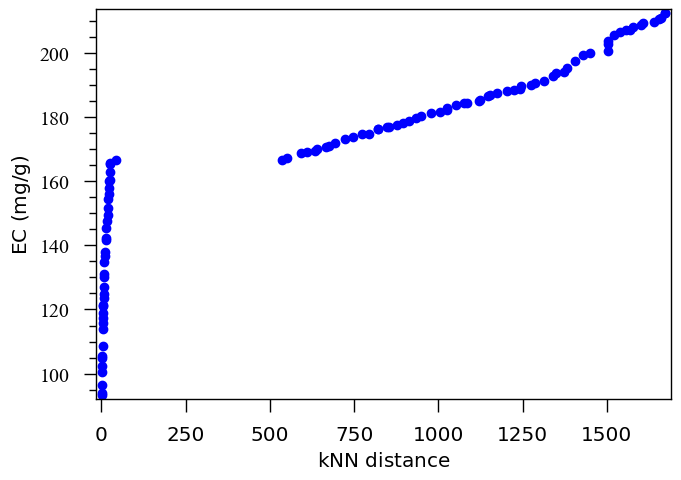

In [22]:
plotter.plot_pareto(
    obj1 = result.F[:, 1],
                    obj2 = -1*result.F[:, 0], ylabel = r'$\rm EC\ (mg/g)$',
                    threshold = threshold)

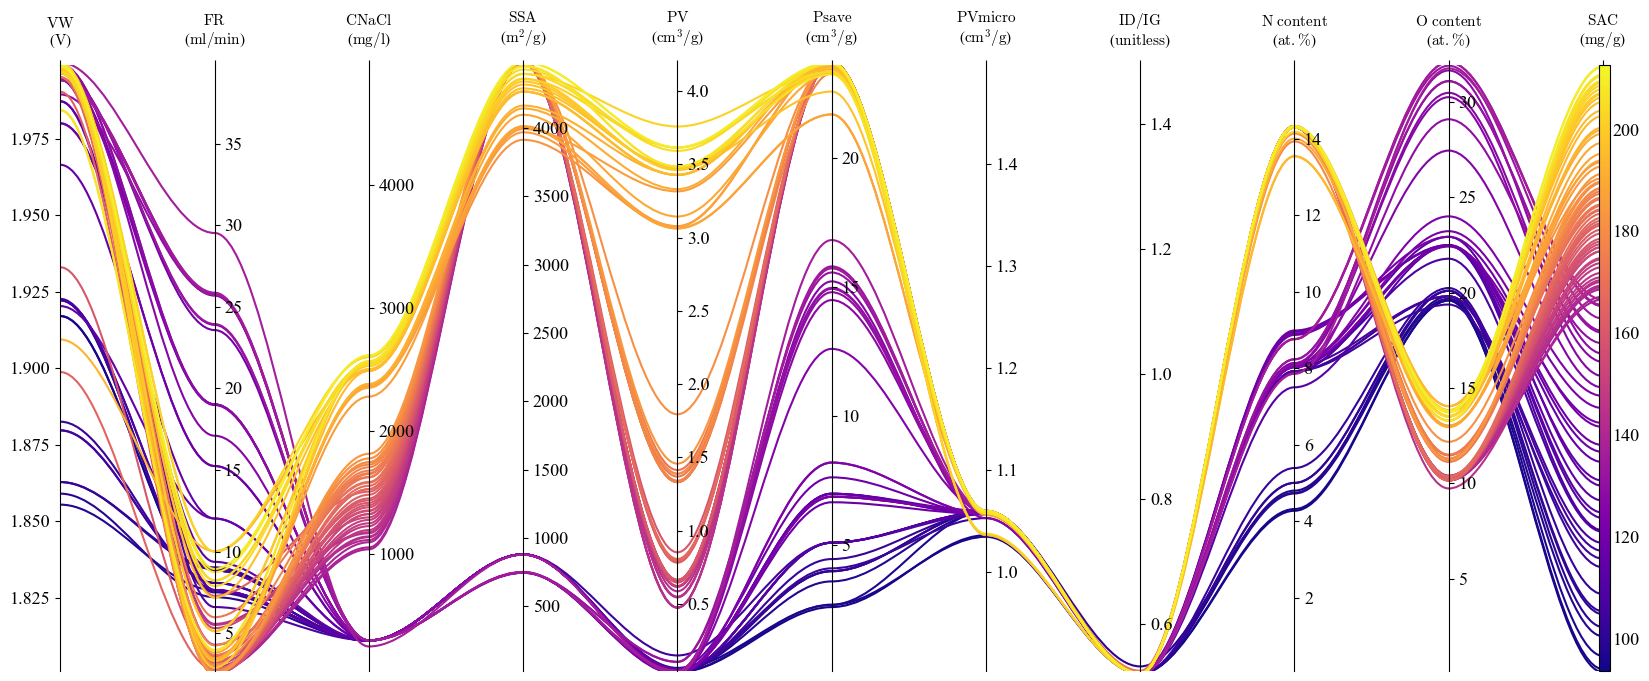

In [23]:
plot_multi_ga_case_D1(result)

The function you have called (subplots_adjust) is not officially supported by Paxplot, but it may still work. Report issues to https://github.com/kravitsjacob/paxplot/issues


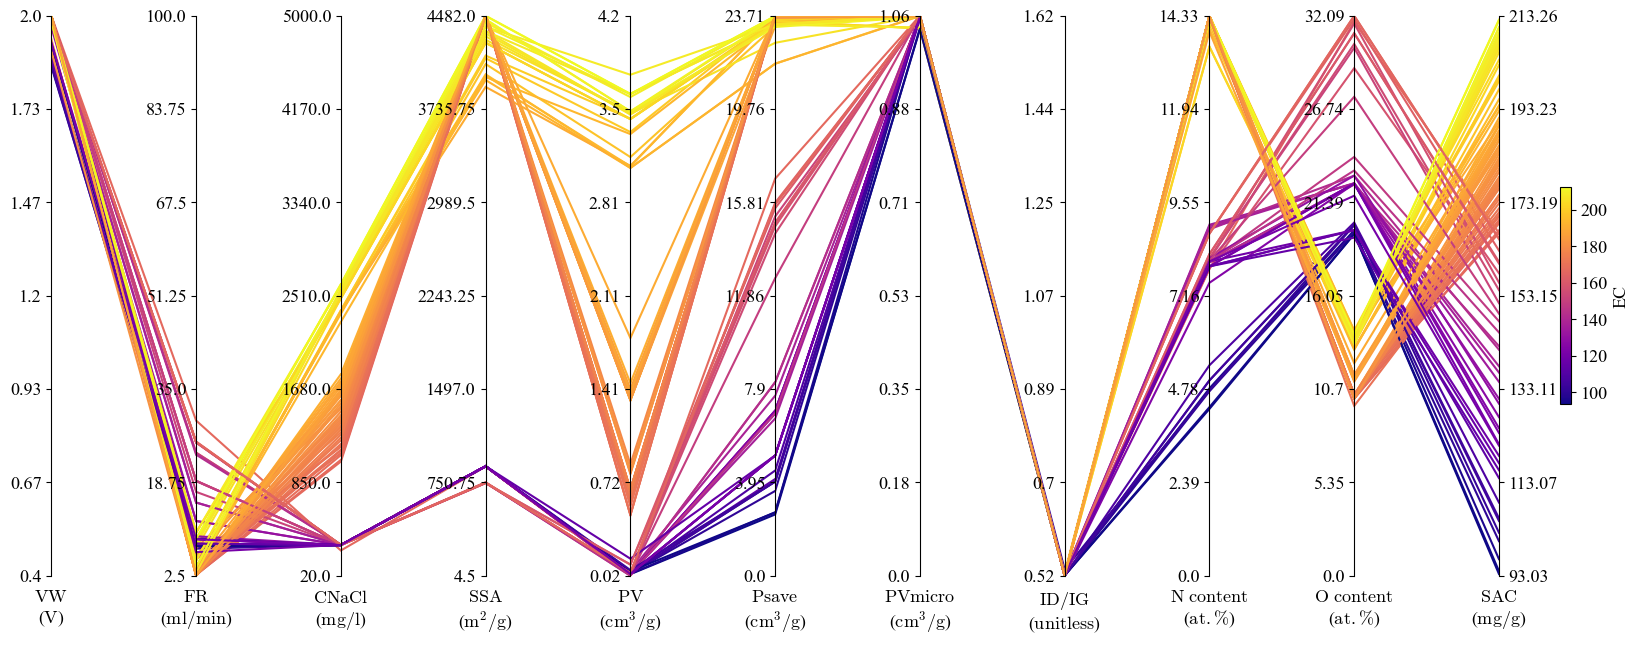

In [24]:

dd = pd.DataFrame(result.X, columns=training_data.columns)
dd['EC'] = -result.F[:, 0]

cols = dd.columns

# Create figure
paxfig = px.pax_parallel(n_axes=len(cols))
paxfig.plot(dd.to_numpy())

# Add labels
paxfig.set_labels(cols)

# Add colorbar
color_col = len(cols) - 1
paxfig.add_colorbar(ax_idx=color_col, cmap='plasma', colorbar_kwargs={'label': cols[color_col]})

# Set limits for each axis
lower_limit = {
                'VW': 0.40, 'FR': 2.50,
                'CNaCl': 20.00, 'SSA': 4.50,
                'PV': 0.02, 'Psave': 0.00,
                'PVmicro': 0.0, 'ID/IG': 0.52,
                'N': 0.00, 'O': 0.00,
                'EC': min(dd['EC']) - min(dd['EC'])*0.004
                }

upper_limit = {
                'VW': 2, 'FR': 100,
                'CNaCl': 5000.00, 'SSA': 4482.00,
                'PV': 4.20, 'Psave': 23.71,
                'PVmicro': 1.06, 'ID/IG': 1.62,
                'N': 14.33, 'O': 32.09,
                'EC': max(dd['EC']) + max(dd['EC'])*0.004
                }

for idx, col in enumerate(cols):
    paxfig.set_lim(ax_idx=idx, bottom=lower_limit[col], top=upper_limit[col]) 

# set figure size
paxfig.set_size_inches(19, 8)
paxfig.subplots_adjust(left=0.1, bottom=0.2, right=0.9, top=0.9)  # Padding

# set labels
all_labels = [
            r'$\rm VW$', r'$\rm FR$', r'$\rm CNaCl$', r'$\rm SSA$', 
            r'$\rm PV$', r'$\rm Psave$', r'$\rm PVmicro$', r'$\rm ID/IG$', 
            r'$\rm N\ content$', r'$\rm O\ content$', r'$\rm SAC$']

all_units = [
            r'$\rm V$', r'$\rm ml/min$', r'$\rm mg/l$', r'$\rm m^{2}/g$', 
            r'$\rm cm^{3}/g$', r'$\rm cm^{3}/g$', r'$\rm cm^{3}/g$', r'$\rm unitless$', 
            r'$\rm at.\%$', r'$\rm at.\%$',  r'$\rm mg/g$']

labels = [f'{all_labels[i]}\n({all_units[i]})' for i in range(len(all_labels))]

paxfig.set_labels(labels)

plt.show()
